## Loading packages


In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import plot_partial_dependence

## Loading Data and perdorming EDA

In [64]:
#Loading the dataset
df = pd.read_csv(r'/path/to/data/CACI_InterviewAssessment_BillDefaults_Data.csv')
df.head()

,uid,late_default,cli_anc,cli_ageband,cli_payment,oc_inc0010,oc_inc50pl,oc_children3pl,oc_children0004,oc_children0510,oc_retired,oc_selfemp,oc_student,oc_unemp,oc_socrent,oc_privrent,oc_overdraft,oc_savs10pl,oc_cards2pl
0,1,1,3300,2,P,0.030355,0.475623,0.021374,0.165254,0.132862,0.000031,0.150273,0.042310,0.025378,0.012832,0.793294,0.172783,0.179815,0.306499
1,2,0,3010,4,D,0.313327,0.060590,0.027987,0.024381,0.066548,0.001478,0.118803,0.007655,0.075782,0.750370,0.069109,0.114262,0.036342,0.075723
2,3,0,2780,6,D,0.063608,0.161459,0.001920,0.003073,0.005036,0.817904,0.021434,0.002262,0.000317,0.026640,0.021453,0.056320,0.304369,0.195838
3,4,0,4400,3,D,0.013214,0.469807,0.195210,0.169214,0.413697,0.000132,0.101393,0.023778,0.029276,0.022806,0.120235,0.184631,0.147863,0.286992
4,5,0,4540,4,D,0.007277,0.527970,0.180975,0.218566,0.414872,0.001453,0.119810,0.002274,0.031067,0.001271,0.082093,0.181568,0.203448,0.244626


In [47]:
#shape of the dataset
df.shape

(20000, 19)

In [48]:
#Data types
df.dtypes

uid                  int64
late_default         int64
cli_anc              int64
cli_ageband          int64
cli_payment         object
oc_inc0010         float64
oc_inc50pl         float64
oc_children3pl     float64
oc_children0004    float64
oc_children0510    float64
oc_retired         float64
oc_selfemp         float64
oc_student         float64
oc_unemp           float64
oc_socrent         float64
oc_privrent        float64
oc_overdraft       float64
oc_savs10pl        float64
oc_cards2pl        float64
dtype: object

In [49]:
#Checking for missing values of each column & their percentage
print(df.isna().sum())


uid                0
late_default       0
cli_anc            0
cli_ageband        0
cli_payment        0
oc_inc0010         0
oc_inc50pl         0
oc_children3pl     0
oc_children0004    0
oc_children0510    0
oc_retired         0
oc_selfemp         0
oc_student         0
oc_unemp           0
oc_socrent         0
oc_privrent        0
oc_overdraft       0
oc_savs10pl        0
oc_cards2pl        0
dtype: int64


In [50]:
#Checking for duplicates of each column
print(df.duplicated().sum())

0


### Summary statistics

In [51]:
#numerical columns
numerical_vars = df.select_dtypes(include='number').columns
numerical_vars = numerical_vars.drop(['uid', 'late_default'])
# Calculate summary statistics
summary_stats = df[numerical_vars].describe()
# Print the summary statistics
print(summary_stats)

             cli_anc  cli_ageband    oc_inc0010    oc_inc50pl  oc_children3pl  \
count   20000.000000  20000.00000  20000.000000  20000.000000    20000.000000   
mean     3529.824500      3.89505      0.074449      0.300304        0.064532   
std      4058.201875      1.74519      0.075572      0.159374        0.077166   
min      1500.000000      1.00000      0.001618      0.001081        0.000042   
25%      2490.000000      2.00000      0.023501      0.172284        0.006586   
50%      3490.000000      4.00000      0.046928      0.299422        0.038373   
75%      4490.000000      5.00000      0.096848      0.418561        0.096738   
max    523450.000000      7.00000      0.545317      0.798334        0.653977   

       oc_children0004  oc_children0510    oc_retired    oc_selfemp  \
count     20000.000000     20000.000000  20000.000000  20000.000000   
mean          0.110644         0.148161      0.193507      0.089410   
std           0.125292         0.149527      0.344225    

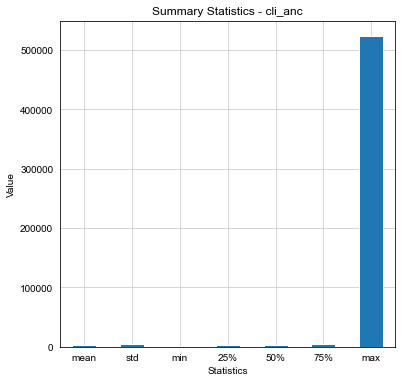

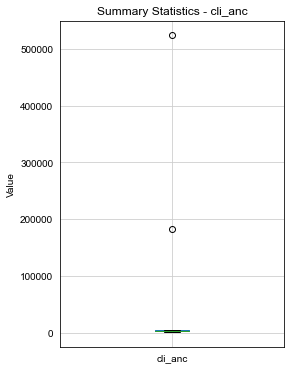

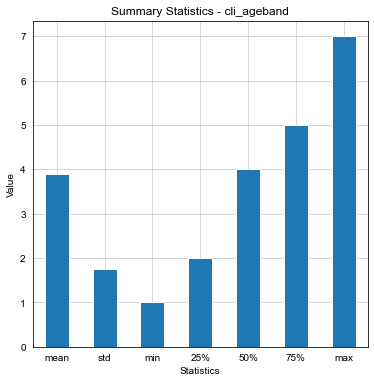

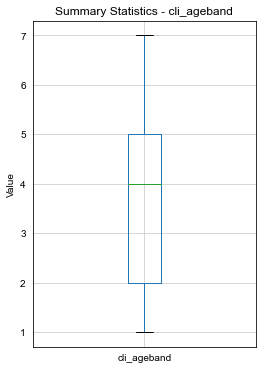

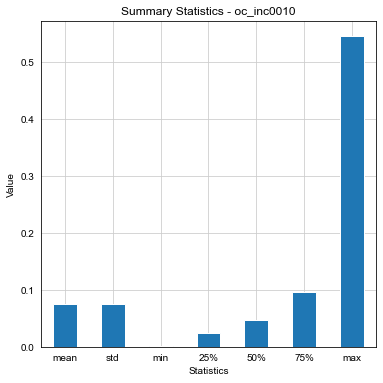

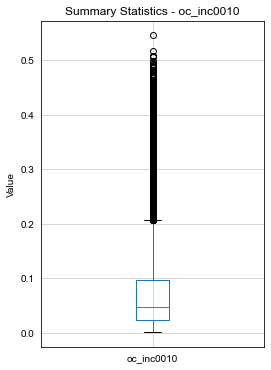

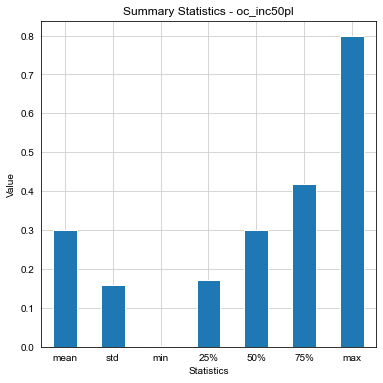

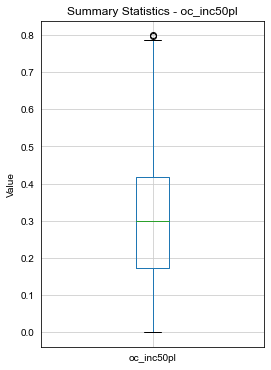

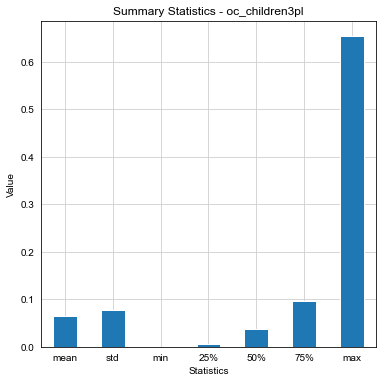

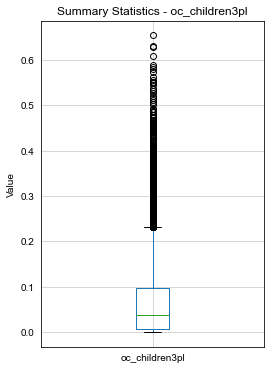

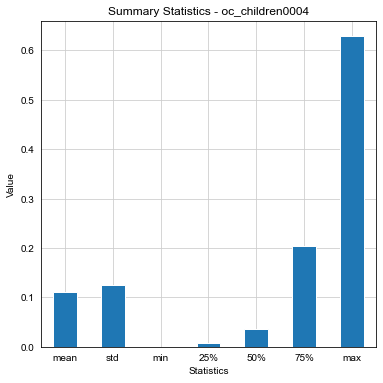

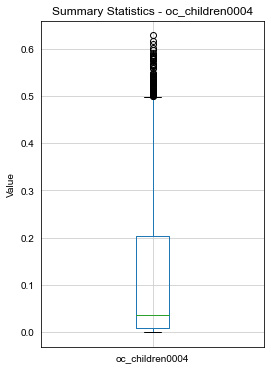

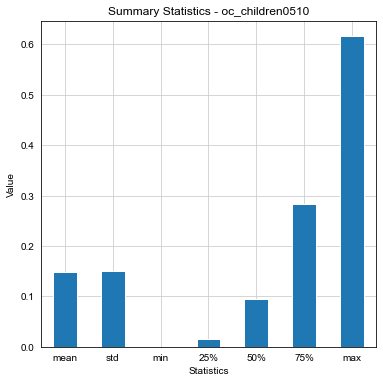

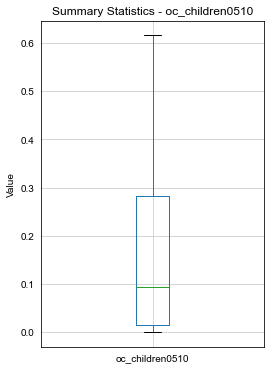

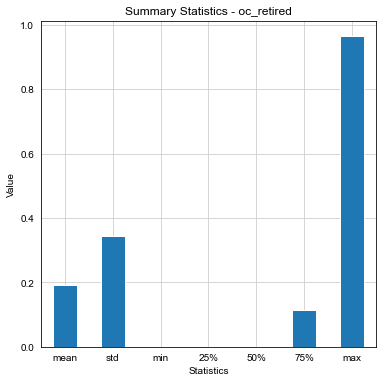

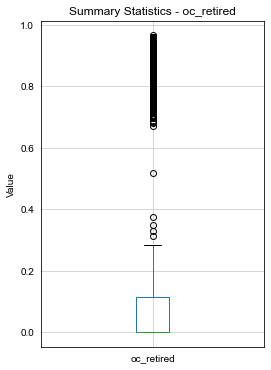

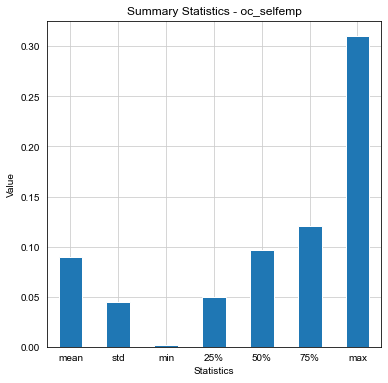

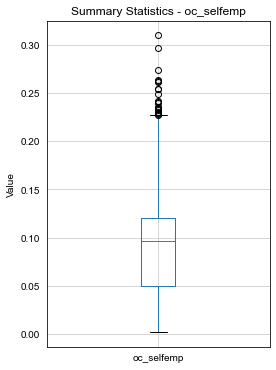

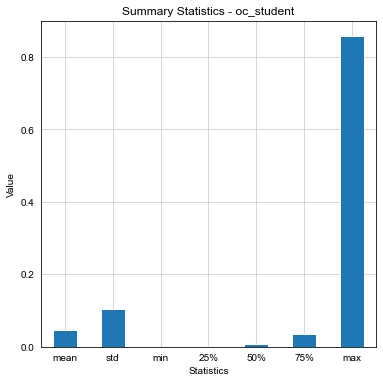

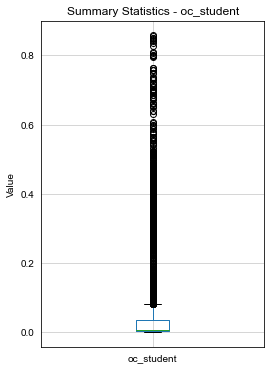

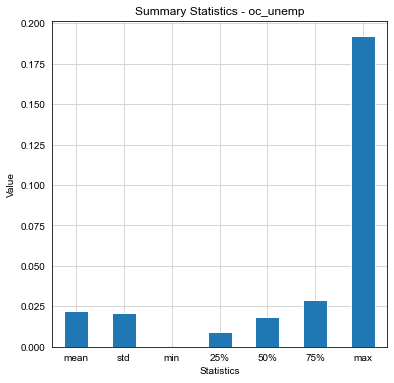

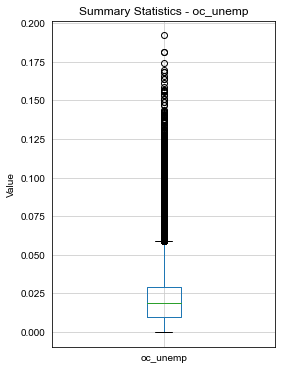

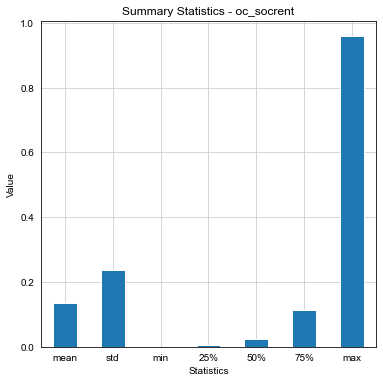

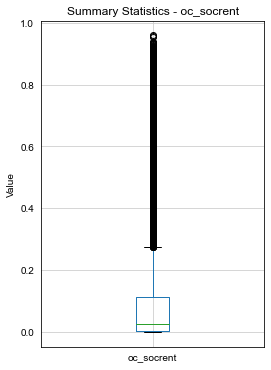

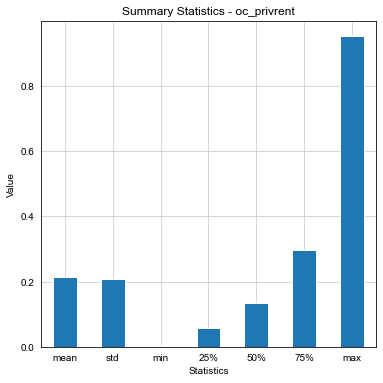

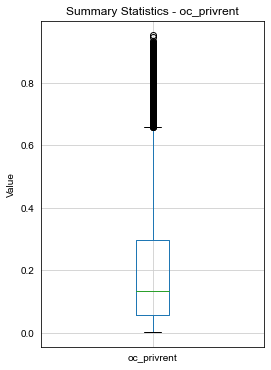

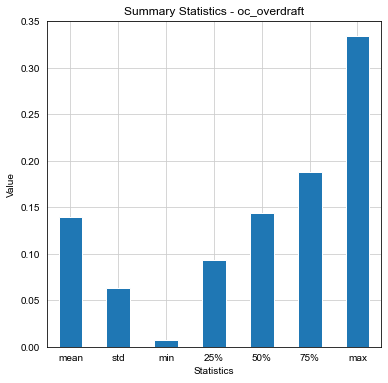

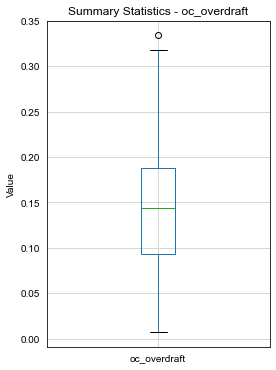

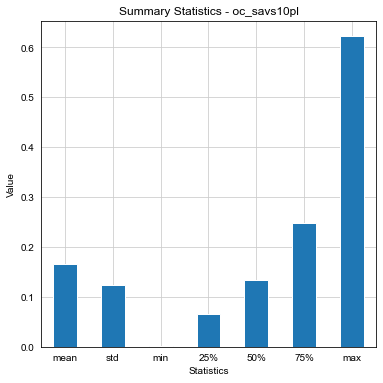

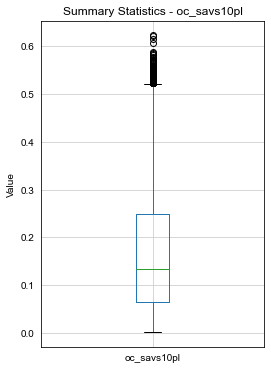

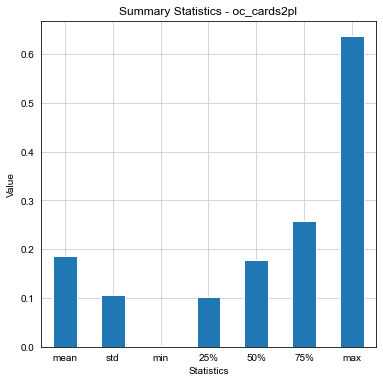

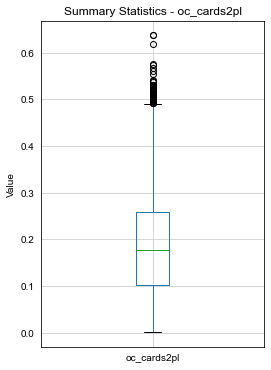

In [52]:
# Calculate and visualize summary statistics for each numerical column
for col in numerical_vars:
    # Calculate summary statistics
    summary_stats = df[col].describe()[1:]
    
    # Bar plot of summary statistics
    summary_stats.plot(kind='bar', figsize=(6, 6), legend=False)
    plt.title(f"Summary Statistics - {col}")
    plt.xlabel("Statistics")
    plt.ylabel("Value")
    plt.xticks(rotation=0)
    plt.show()
    
    # Box plot of summary statistics
    df.boxplot(column=col, figsize=(4, 6))
    plt.title(f"Summary Statistics - {col}")
    plt.ylabel("Value")
    plt.xticks(rotation=0)
    plt.show()

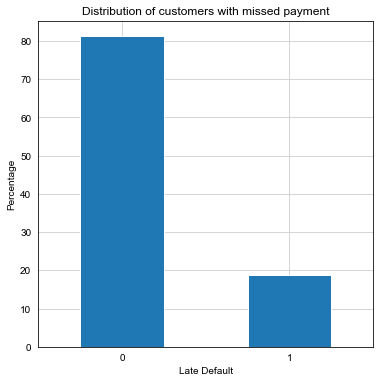

In [98]:
# Calculate the percentage of customers with late or defaulted payments
percentage = df['late_default'].value_counts(normalize=True) * 100

# Bar plot of the target variable distribution
percentage.plot(kind='bar', figsize=(6, 6))
plt.title("Distribution of Late Default")
plt.xlabel("Late Default")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.show()

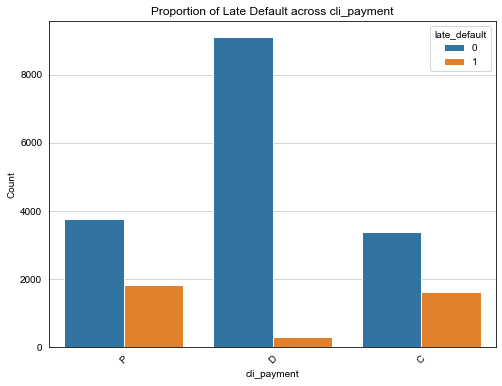

No handles with labels found to put in legend.


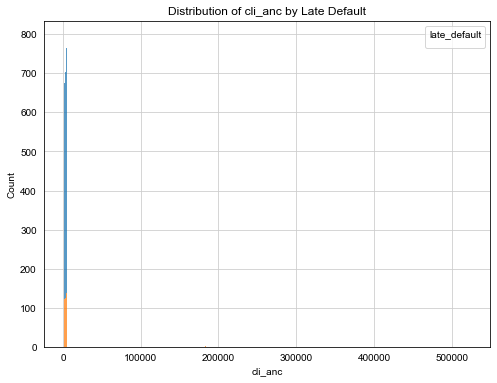

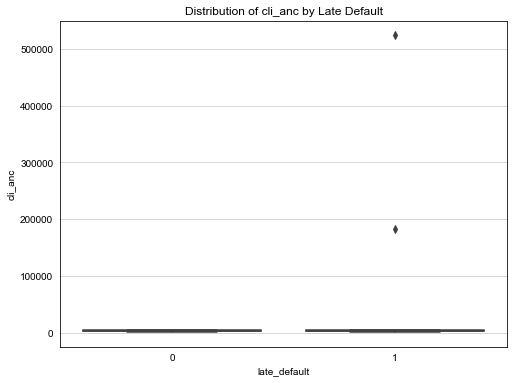

No handles with labels found to put in legend.


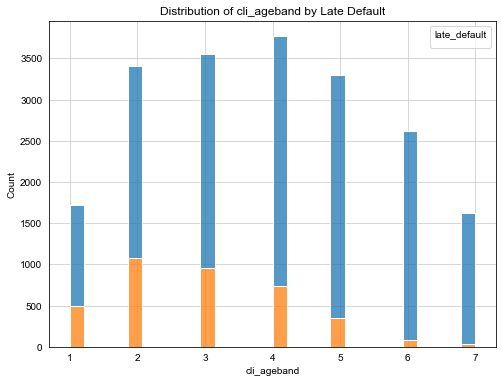

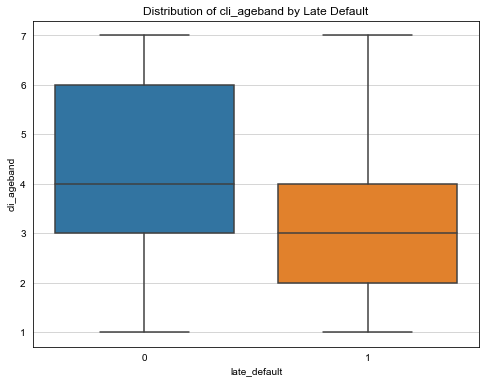

No handles with labels found to put in legend.


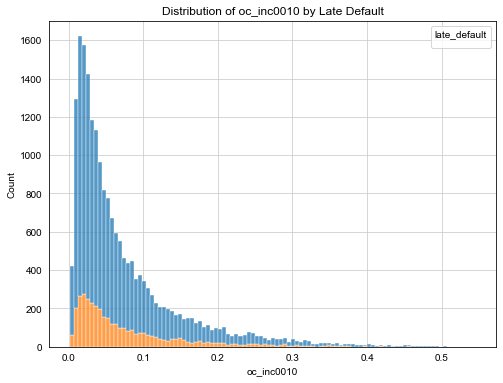

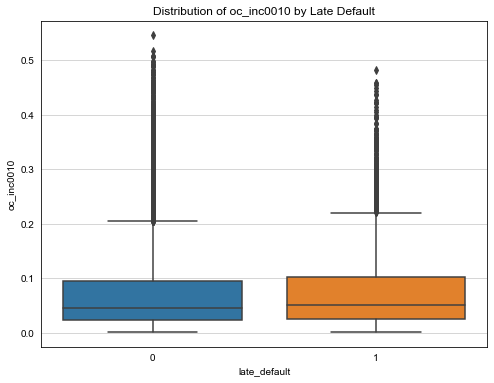

No handles with labels found to put in legend.


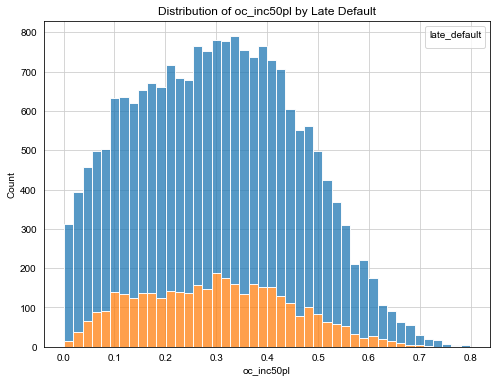

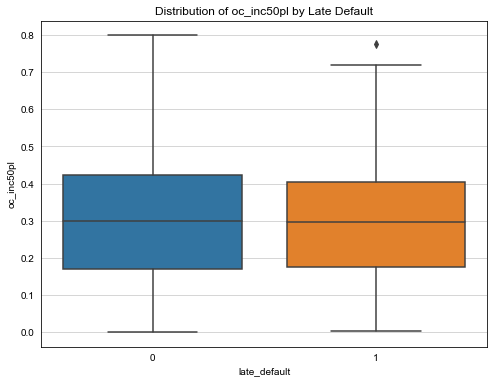

No handles with labels found to put in legend.


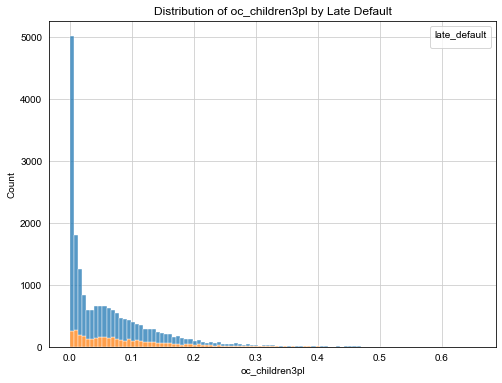

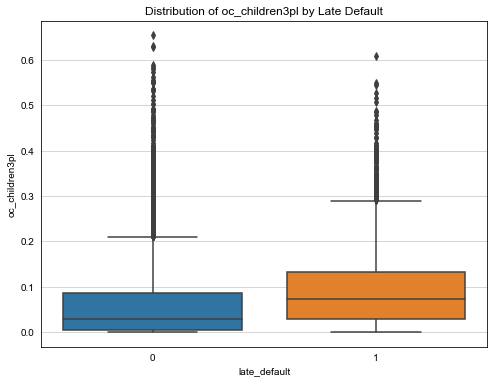

No handles with labels found to put in legend.


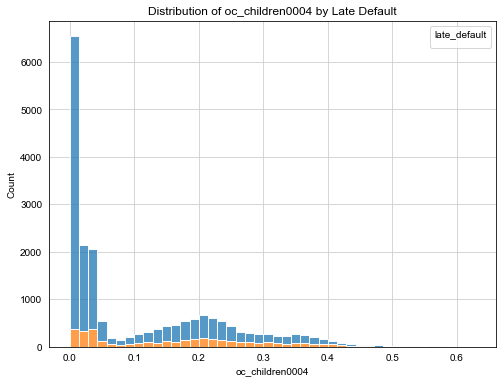

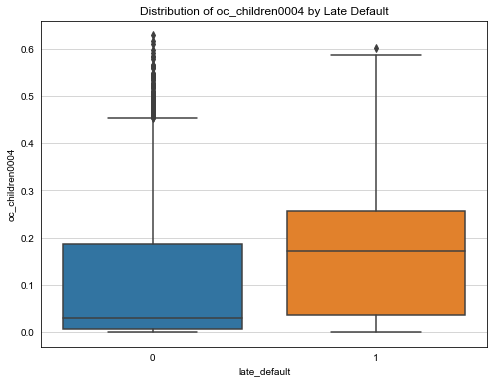

No handles with labels found to put in legend.


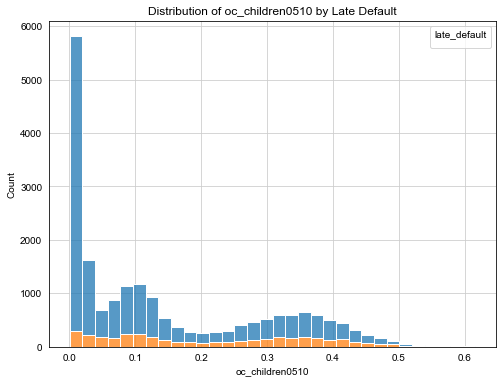

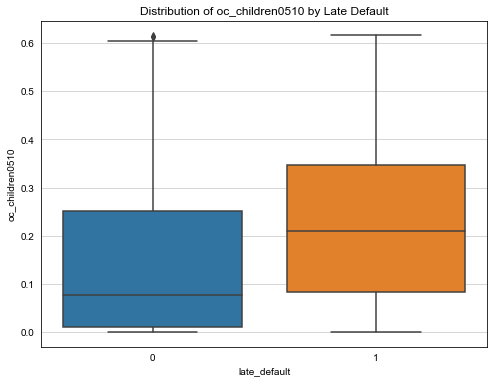

No handles with labels found to put in legend.


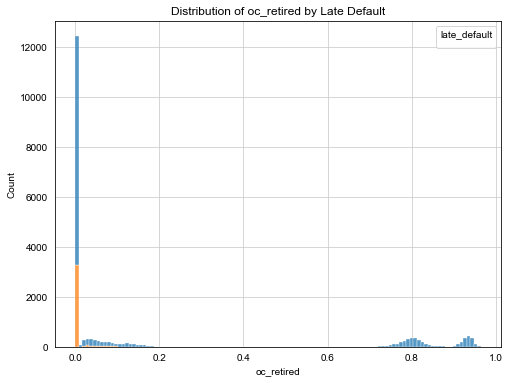

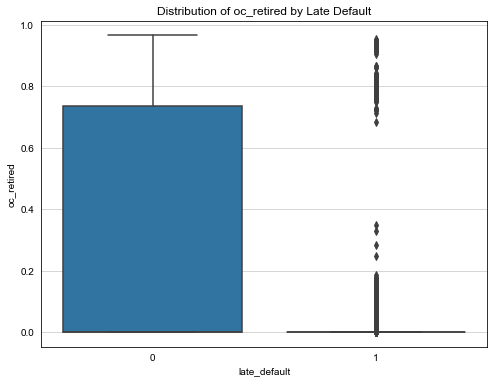

No handles with labels found to put in legend.


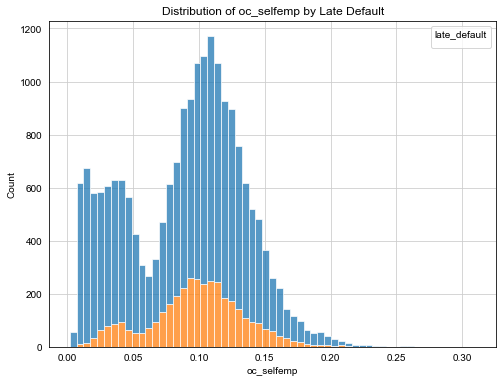

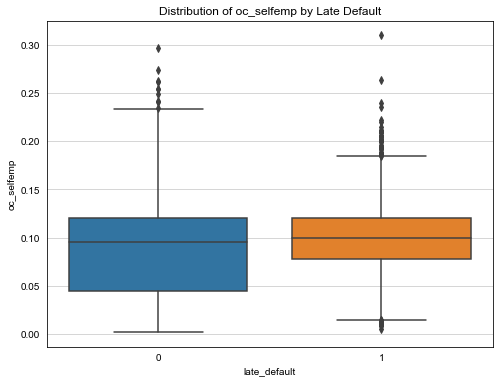

No handles with labels found to put in legend.


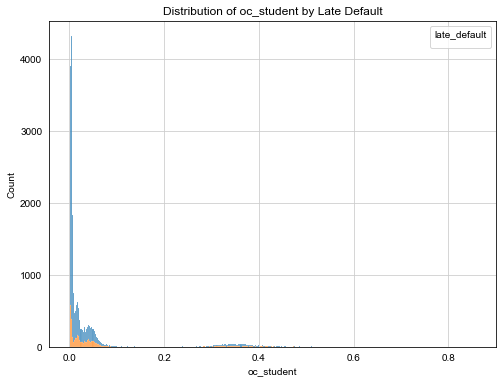

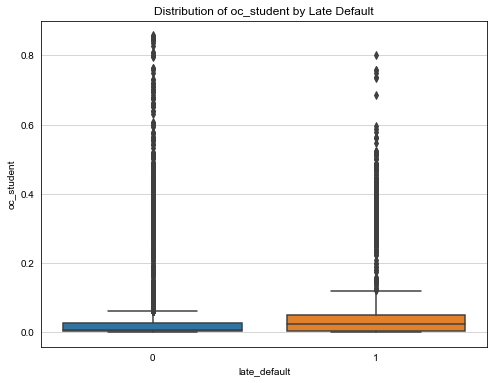

No handles with labels found to put in legend.


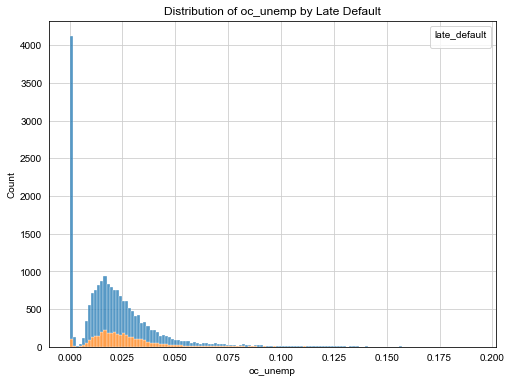

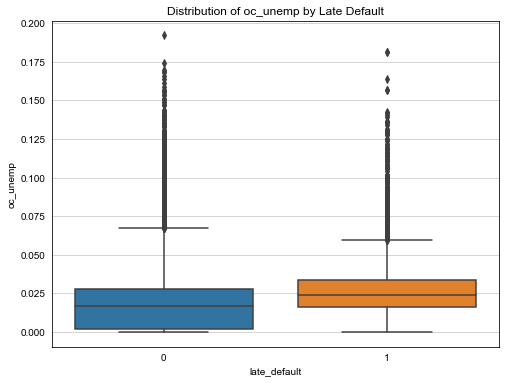

No handles with labels found to put in legend.


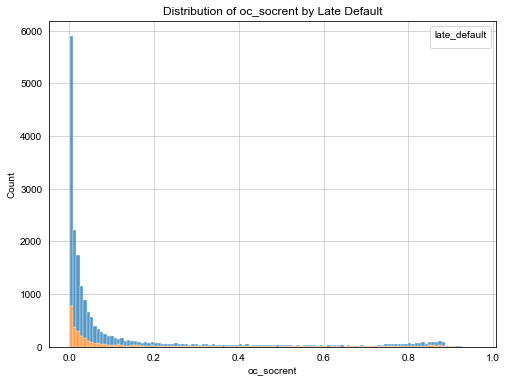

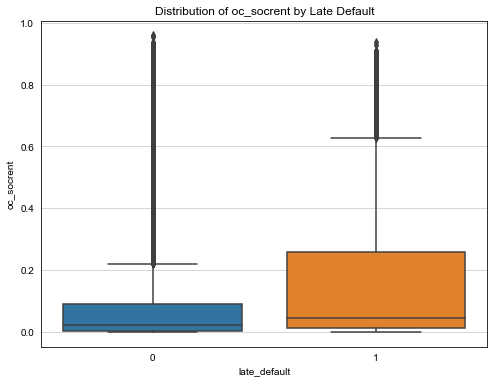

No handles with labels found to put in legend.


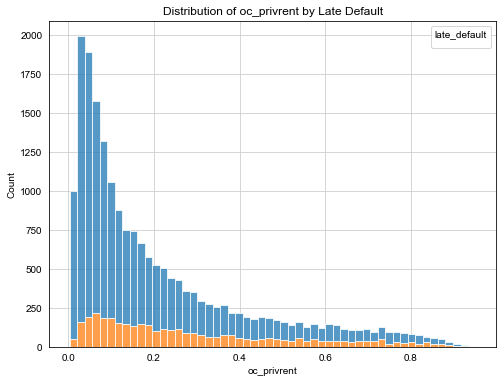

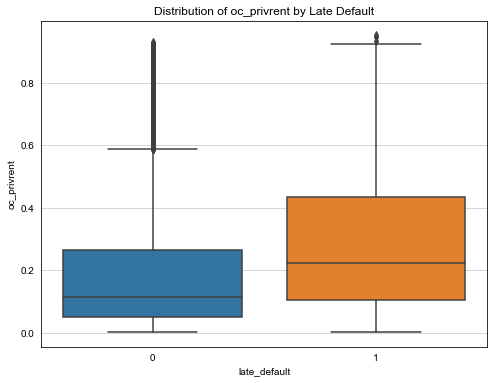

No handles with labels found to put in legend.


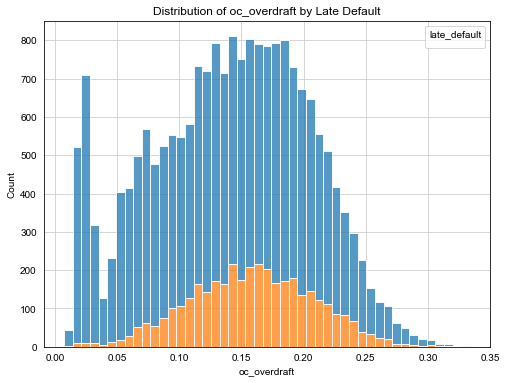

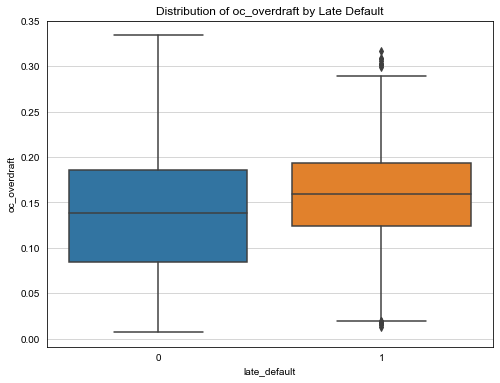

No handles with labels found to put in legend.


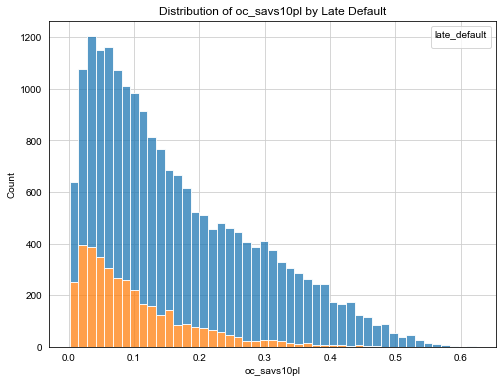

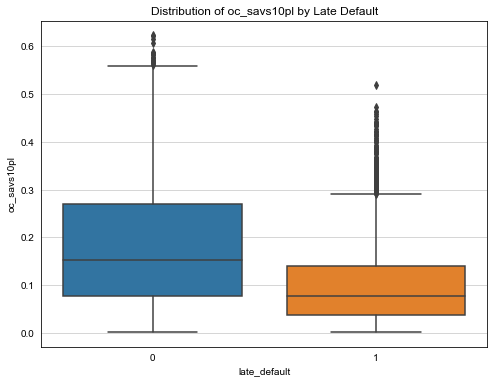

No handles with labels found to put in legend.


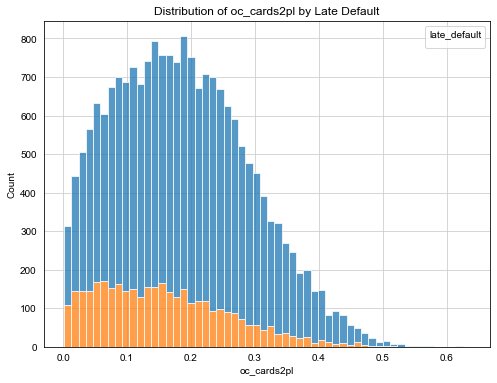

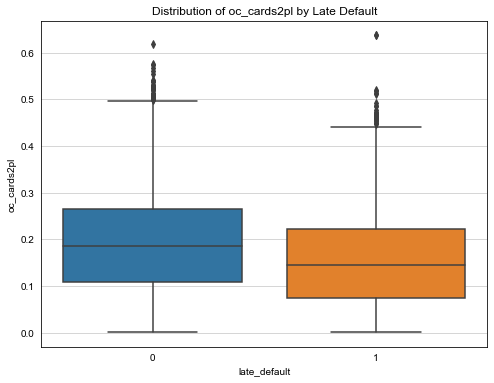

KeyError: "None of [Index(['cli_anclate_default', 'cli_agebandlate_default',\n       'oc_inc0010late_default', 'oc_inc50pllate_default',\n       'oc_children3pllate_default', 'oc_children0004late_default',\n       'oc_children0510late_default', 'oc_retiredlate_default',\n       'oc_selfemplate_default', 'oc_studentlate_default',\n       'oc_unemplate_default', 'oc_socrentlate_default',\n       'oc_privrentlate_default', 'oc_overdraftlate_default',\n       'oc_savs10pllate_default', 'oc_cards2pllate_default'],\n      dtype='object')] are in the [columns]"

<Figure size 720x576 with 0 Axes>

In [54]:
# Categorical variable analysis
categorical_vars = ['cli_payment']
target_var = 'late_default'

for cat_var in categorical_vars:
    # Create a bar plot to compare proportions across categories
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=cat_var, hue=target_var)
    plt.title(f"Proportion of Late Default across {cat_var}")
    plt.xlabel(cat_var)
    plt.ylabel("Count")
    plt.legend(title=target_var, loc="upper right")
    plt.xticks(rotation=45)
    plt.show()

# Numerical variable analysis


for num_var in numerical_vars:
    # Create histograms for customers with and without late or defaulted payments
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=num_var, hue=target_var, multiple="stack")
    plt.title(f"Distribution of {num_var} by Late Default")
    plt.xlabel(num_var)
    plt.ylabel("Count")
    plt.legend(title=target_var, loc="upper right")
    plt.show()

    # Create box plots to compare distributions between customers with and without late or defaulted payments
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=target_var, y=num_var)
    plt.title(f"Distribution of {num_var} by Late Default")
    plt.xlabel(target_var)
    plt.ylabel(num_var)
    plt.show()

# Correlation matrix


plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_vars + [target_var]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

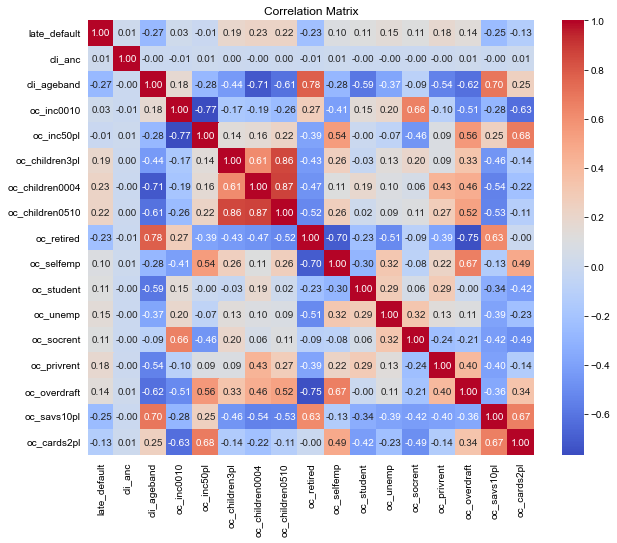

In [55]:
# Categorical variable analysis
# Correlation matrix

plt.figure(figsize=(10, 8))
corr_matrix = (df.drop(['uid', 'cli_payment'], axis=1)).corr()
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [66]:
df_scaled = df.copy()
# Check the scale of numerical features
feature_scales = df_scaled[numerical_vars].max() - df_scaled[numerical_vars].min()

# Identify features that need scaling based on a threshold 
threshold = 10
features_to_scale = feature_scales[feature_scales > threshold].index.tolist()

# Perform scaling on the selected features
scaler = StandardScaler()

df_scaled[features_to_scale] = scaler.fit_transform(df_scaled[features_to_scale])

# Display the updated dataset
df_scaled.head()

,uid,late_default,cli_anc,cli_ageband,cli_payment,oc_inc0010,oc_inc50pl,oc_children3pl,oc_children0004,oc_children0510,oc_retired,oc_selfemp,oc_student,oc_unemp,oc_socrent,oc_privrent,oc_overdraft,oc_savs10pl,oc_cards2pl
0,1,1,-0.056634,2,P,0.030355,0.475623,0.021374,0.165254,0.132862,0.000031,0.150273,0.042310,0.025378,0.012832,0.793294,0.172783,0.179815,0.306499
1,2,0,-0.128096,4,D,0.313327,0.060590,0.027987,0.024381,0.066548,0.001478,0.118803,0.007655,0.075782,0.750370,0.069109,0.114262,0.036342,0.075723
2,3,0,-0.184772,6,D,0.063608,0.161459,0.001920,0.003073,0.005036,0.817904,0.021434,0.002262,0.000317,0.026640,0.021453,0.056320,0.304369,0.195838
3,4,0,0.214429,3,D,0.013214,0.469807,0.195210,0.169214,0.413697,0.000132,0.101393,0.023778,0.029276,0.022806,0.120235,0.184631,0.147863,0.286992
4,5,0,0.248928,4,D,0.007277,0.527970,0.180975,0.218566,0.414872,0.001453,0.119810,0.002274,0.031067,0.001271,0.082093,0.181568,0.203448,0.244626


## Modelling

In [68]:
# Define x and y 
# Separate the features and target variable
X = df_scaled.drop(["late_default", "uid"], axis=1)  # Exclude target variable and non-relevant column "UID"
y = df_scaled["late_default"]

# Identify categorical features
categorical_features = X.select_dtypes(include=["object"]).columns

# Perform one-hot encoding on categorical features
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X[categorical_features])

# Convert encoded features back to DataFrame
encoded_feature_names = encoder.get_feature_names(categorical_features)
X_encoded_df = pd.DataFrame(X_encoded.toarray(), columns=encoded_feature_names)

# Concatenate encoded features with numerical features
X = pd.concat([X.drop(categorical_features, axis=1), X_encoded_df], axis=1)


In [69]:

# Feature Importance using Random Forest
rf = RandomForestClassifier()
rf.fit(X, y)
feature_importance_rf = rf.feature_importances_

# Feature Importance using Statistical Methods 
selector = SelectKBest(score_func=f_classif, k="all")
selector.fit(X, y)
feature_importance_stat = selector.scores_

# Create a DataFrame to store feature names and importance scores
feature_importance = pd.DataFrame({"Feature": X.columns, "RF Importance": feature_importance_rf,
                                   "Stat Importance": feature_importance_stat})

# Sort features by importance scores
feature_importance = feature_importance.sort_values(by=["RF Importance", "Stat Importance"], ascending=False)

# Display the top 10 most relevant features
print("Top 10 Most Relevant Features:")
print(feature_importance.head(10))

Top 10 Most Relevant Features:
            Feature  RF Importance  Stat Importance
17    cli_payment_D       0.096588      3272.816781
7        oc_retired       0.067864      1087.335363
5   oc_children0004       0.063347      1066.697326
14      oc_savs10pl       0.058313      1381.969099
9        oc_student       0.057529       244.407641
6   oc_children0510       0.056888      1036.875559
10         oc_unemp       0.056411       451.005025
11       oc_socrent       0.055813       264.143674
12      oc_privrent       0.053392       680.900529
13     oc_overdraft       0.052841       387.843458


In [74]:
# Split the data into train, test, and validation sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

In [82]:
# Perform logistic regression modeling
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_m1 = logreg.predict(X_test)

# Evaluate the model
accuracy_m1 = accuracy_score(y_test, y_pred_m1)
precision_m1 = precision_score(y_test, y_pred_m1)
recall_m1 = recall_score(y_test, y_pred_m1)
f1_m1= f1_score(y_test, y_pred_m1)

print("Evaluation Metrics on Test Set:")
print("Accuracy:", accuracy_m1)
print("Precision:", precision_m1)
print("Recall:", recall_m1)
print("F1 Score:", f1_m1)

# Perform cross-validation to assess model's robustness
cv_scores = cross_val_score(logreg, X_train_val, y_train_val, cv=5)
print("Cross-Validation Scores:")
print(cv_scores)

# Fine-tune parameters using the validation set
param_grid = {'C': [0.1, 1.0, 10.0]}
grid_search = GridSearchCV(logreg, param_grid, cv=3)
grid_search.fit(X_train_val, y_train_val)

best_params_m1 = grid_search.best_params_
print("Best Parameters:", best_params_m1)

# Retrain the model with the best parameters
logreg_best = LogisticRegression(**best_params_m1,max_iter=1000)
logreg_best.fit(X_train_val, y_train_val)

# Make predictions on the test set with the tuned model
y_pred_best_m1 = logreg_best.predict(X_test)

# Evaluate the tuned model
accuracy_best_m1 = accuracy_score(y_test, y_pred_best_m1)
precision_best_m1 = precision_score(y_test, y_pred_best_m1)
recall_best_m1 = recall_score(y_test, y_pred_best_m1)
f1_best_m1 = f1_score(y_test, y_pred_best_m1)

print("Evaluation Metrics on Test Set (Tuned Model):")
print("Accuracy:", accuracy_best_m1)
print("Precision:", precision_best_m1)
print("Recall:", recall_best_m1)
print("F1 Score:", f1_best_m1)

coefs_m1 = logreg_best.coef_[0]
feature_importance_df_m1 = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefs_m1})
sorted_feature_importance_m1 = feature_importance_df_m1.sort_values(by='Coefficient', ascending=False)

print("Feature Importance (Logistic Regression Coefficients):")
print(sorted_feature_importance_m1)


Evaluation Metrics on Test Set:
Accuracy: 0.82275
Precision: 0.5392670157068062
Recall: 0.2787550744248985
F1 Score: 0.367528991971454
Cross-Validation Scores:
[0.82625   0.824375  0.82      0.8215625 0.8290625]
Best Parameters: {'C': 10.0}
Evaluation Metrics on Test Set (Tuned Model):
Accuracy: 0.82725
Precision: 0.5585365853658537
Recall: 0.30987821380243574
F1 Score: 0.3986074847693647
Feature Importance (Logistic Regression Coefficients):
            Feature  Coefficient
8        oc_selfemp     2.601740
10         oc_unemp     2.226816
15      oc_cards2pl     2.033617
6   oc_children0510     0.989441
12      oc_privrent     0.863426
18    cli_payment_P     0.741850
16    cli_payment_C     0.702488
4    oc_children3pl     0.617403
11       oc_socrent     0.598641
2        oc_inc0010     0.552103
0           cli_anc     0.027919
1       cli_ageband    -0.260955
5   oc_children0004    -0.268674
9        oc_student    -0.492814
3        oc_inc50pl    -0.876736
7        oc_retired    -1

In [83]:
# Perform random forest modeling
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_m2 = rf.predict(X_test)

# Evaluate the model
accuracy_m2 = accuracy_score(y_test, y_pred_m2)
precision_m2 = precision_score(y_test, y_pred_m2)
recall_m2 = recall_score(y_test, y_pred_m2)
f1_m2 = f1_score(y_test, y_pred_m2)

print("Evaluation Metrics on Test Set:")
print("Accuracy:", accuracy_m2)
print("Precision:", precision_m2)
print("Recall:", recall_m2)
print("F1 Score:", f1_m2)

# Perform cross-validation to assess model's robustness
cv_scores_m2 = cross_val_score(rf, X_train_val, y_train_val, cv=5)
print("Cross-Validation Scores:")
print(cv_scores_m2)

# Fine-tune parameters using the validation set
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(rf, param_grid, cv=3)
grid_search.fit(X_val, y_val)
best_params_m2 = grid_search.best_params_

print("Best Parameters:")
print(best_params_m2)

# Fit the model with the best parameters
rf_best = RandomForestClassifier(random_state=42, **best_params_m2)
rf_best.fit(X_train_val, y_train_val)

# Feature importance
feature_importance_m2 = rf_best.feature_importances_
feature_importance_df_m2 = pd.DataFrame({'Feature': X_train_val.columns, 'Importance': feature_importance_m2})
sorted_feature_importance_m2 = feature_importance_df_m2.sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(sorted_feature_importance_m2)


Evaluation Metrics on Test Set:
Accuracy: 0.82725
Precision: 0.5540540540540541
Recall: 0.33288227334235454
F1 Score: 0.41589180050718516
Cross-Validation Scores:
[0.8140625 0.821875  0.820625  0.8265625 0.8228125]
Best Parameters:
{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Feature Importance:
            Feature  Importance
17    cli_payment_D    0.218548
7        oc_retired    0.074940
5   oc_children0004    0.058821
18    cli_payment_P    0.057019
6   oc_children0510    0.052061
14      oc_savs10pl    0.051015
10         oc_unemp    0.050421
16    cli_payment_C    0.044362
9        oc_student    0.043173
11       oc_socrent    0.041724
1       cli_ageband    0.039472
12      oc_privrent    0.039312
2        oc_inc0010    0.035527
4    oc_children3pl    0.033891
3        oc_inc50pl    0.033797
13     oc_overdraft    0.033547
8        oc_selfemp    0.033131
15      oc_cards2pl    0.030121
0           cli_anc    0.029117


In [84]:
# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model on the training set
dt_classifier.fit(X_train, y_train)

# Predict on the validation set
y_val_pred_m3 = dt_classifier.predict(X_val)

# Evaluate the model on the validation set
accuracy_m3 = accuracy_score(y_val, y_val_pred_m3)
precision_m3 = precision_score(y_val, y_val_pred_m3)
recall_m3 = recall_score(y_val, y_val_pred_m3)
f1_m3 = f1_score(y_val, y_val_pred_m3)

print("Validation Set Metrics:")
print("Accuracy:", accuracy_m3)
print("Precision:", precision_m3)
print("Recall:", recall_m3)
print("F1 Score:", f1_m3)

# Perform cross-validation to assess model robustness
cv_scores_m3 = cross_val_score(dt_classifier, X_train_val, y_train_val, cv=5)
print("Cross-Validation Scores:")
print(cv_scores_m3)

# Use the validation set to fine-tune parameters and prevent overfitting 
feature_importance_m3 = dt_classifier.feature_importances_
feature_importance_df_m3 = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance_m3})
sorted_feature_importance_m3 = feature_importance_df_m3.sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(sorted_feature_importance_m3)

# Evaluate the model on the test set
y_test_pred_m3 = dt_classifier.predict(X_test)

# Calculate metrics on the test set
accuracy_test_m3 = accuracy_score(y_test, y_test_pred_m3)
precision_test_m3 = precision_score(y_test, y_test_pred_m3)
recall_test_m3 = recall_score(y_test, y_test_pred_m3)
f1_test_m3 = f1_score(y_test, y_test_pred_m3)

print("Test Set Metrics:")
print("Accuracy:", accuracy_test_m3)
print("Precision:", precision_test_m3)
print("Recall:", recall_test_m3)
print("F1 Score:", f1_test_m3)

Validation Set Metrics:
Accuracy: 0.7778125
Precision: 0.4154103852596315
Recall: 0.4065573770491803
F1 Score: 0.4109362054681027
Cross-Validation Scores:
[0.77375   0.7690625 0.7825    0.784375  0.77     ]
Feature Importance:
            Feature  Importance
7        oc_retired    0.138473
17    cli_payment_D    0.137721
14      oc_savs10pl    0.061291
0           cli_anc    0.058996
9        oc_student    0.058984
10         oc_unemp    0.058624
12      oc_privrent    0.057298
5   oc_children0004    0.052804
11       oc_socrent    0.052034
13     oc_overdraft    0.049312
8        oc_selfemp    0.049196
3        oc_inc50pl    0.047571
6   oc_children0510    0.046089
4    oc_children3pl    0.044903
2        oc_inc0010    0.042734
15      oc_cards2pl    0.036382
18    cli_payment_P    0.003581
16    cli_payment_C    0.002670
1       cli_ageband    0.001339
Test Set Metrics:
Accuracy: 0.76875
Precision: 0.38375
Recall: 0.41542625169147496
F1 Score: 0.3989603638726446


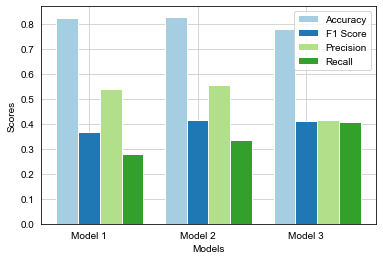

In [88]:

models = ['Model 1', 'Model 2', 'Model 3']
accuracy = [accuracy_m1, accuracy_m2, accuracy_m3]
f1_score = [f1_m1, f1_m2, f1_m3]
precision = [precision_m1, precision_m2, precision_m3]
recall = [recall_m1, recall_m2, recall_m3]

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Define the colors
colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c']

# Plot the bars
plt.bar(r1, accuracy, color=colors[0], width=bar_width, edgecolor='white', label='Accuracy')
plt.bar(r2, f1_score, color=colors[1], width=bar_width, edgecolor='white', label='F1 Score')
plt.bar(r3, precision, color=colors[2], width=bar_width, edgecolor='white', label='Precision')
plt.bar(r4, recall, color=colors[3], width=bar_width, edgecolor='white', label='Recall')

# Add xticks and labels
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks([r + bar_width for r in range(len(models))], models)

# Add a legend
plt.legend()

# Show the plot
plt.show()


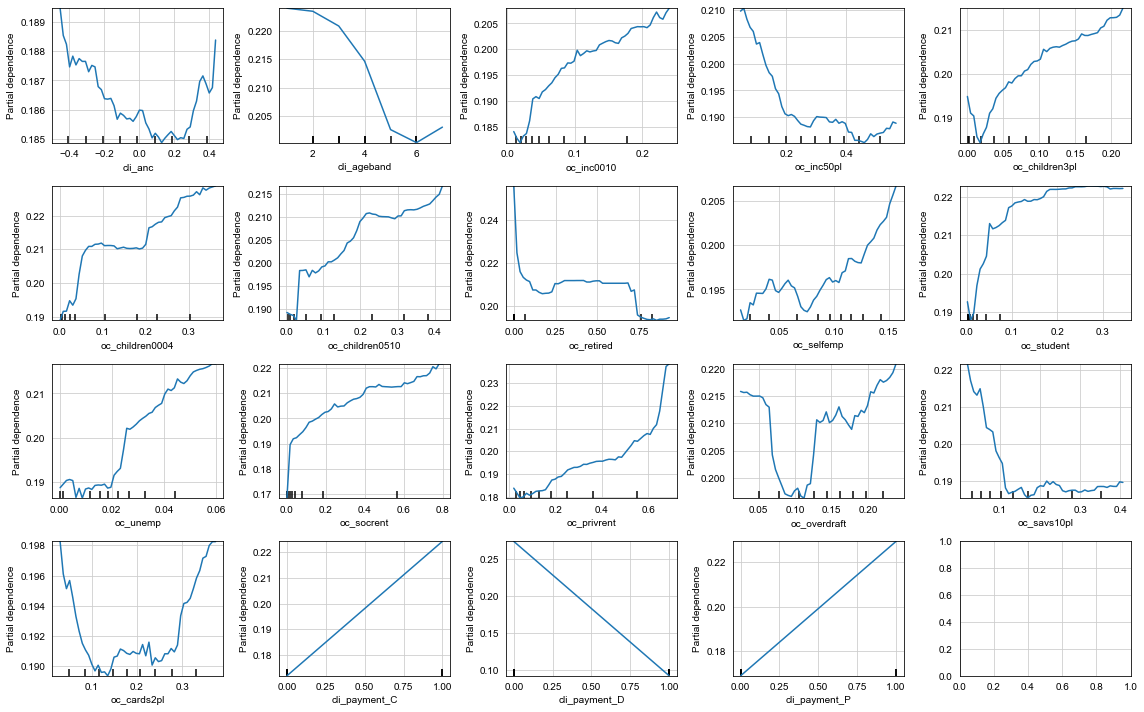

In [99]:
# Partial dependence plots for the second model
# Determine the number of features for plotting
feature_names = X_train_val.columns.tolist()
n_features = min(X_train_val.shape[1], len(feature_importance_m2))

# Create subplots based on the number of features
fig, axs = plt.subplots(nrows=(n_features // 5) + 1, ncols=5, figsize=(16, 10))

# Flatten the axs array to iterate over it easily
axs = axs.flatten()

# Create partial dependence plots for each feature
for i, feature_idx in enumerate(range(n_features)):
    if i < n_features:
        plot_partial_dependence(rf_best, X_train_val, features=[feature_idx], feature_names=feature_names, n_jobs=-1, grid_resolution=50, ax=axs[i])
    else:
        axs[i].axis('off')

# Set the layout and display the plots
fig.tight_layout()
plt.show()
